# Data Cleaning and **Preparation**

In [4]:
import pandas as pd

data = pd.read_csv("googleplaystore.csv")
data


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [6]:
data.dropna(inplace=True)

data.drop_duplicates(inplace=True)



In [14]:
data['Reviews'] = data['Reviews'].astype(int)
data['Size'] = data['Size'].str.replace('M', '')
data['Size'] = pd.to_numeric(data['Size'], errors='coerce')
data['Installs'] = data['Installs'].str.replace('+', '').str.replace(',', '').astype(int)
data['Price'] = data['Price'].str.replace('$', '').astype(float)


# Data **Analysis**

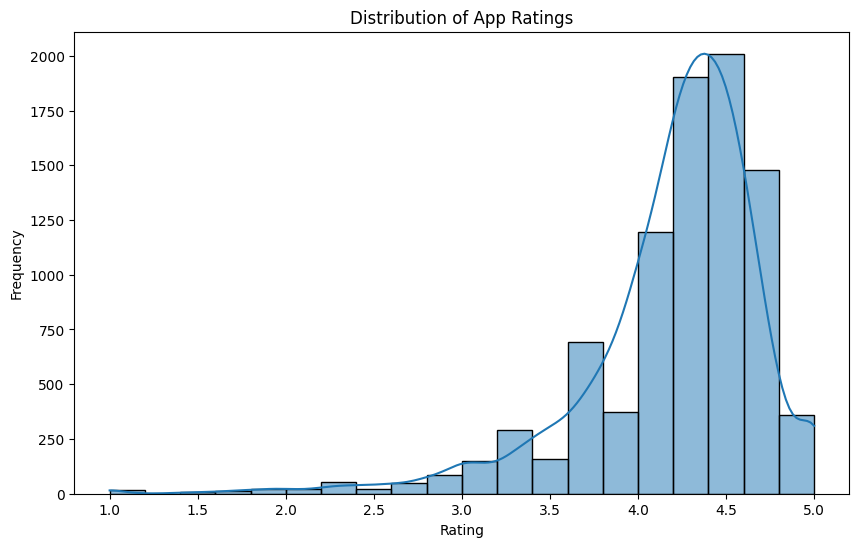

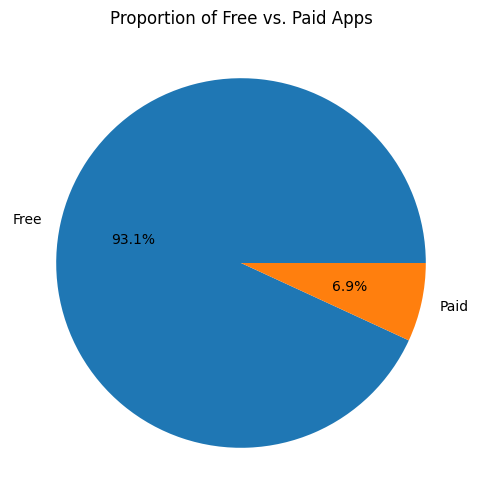

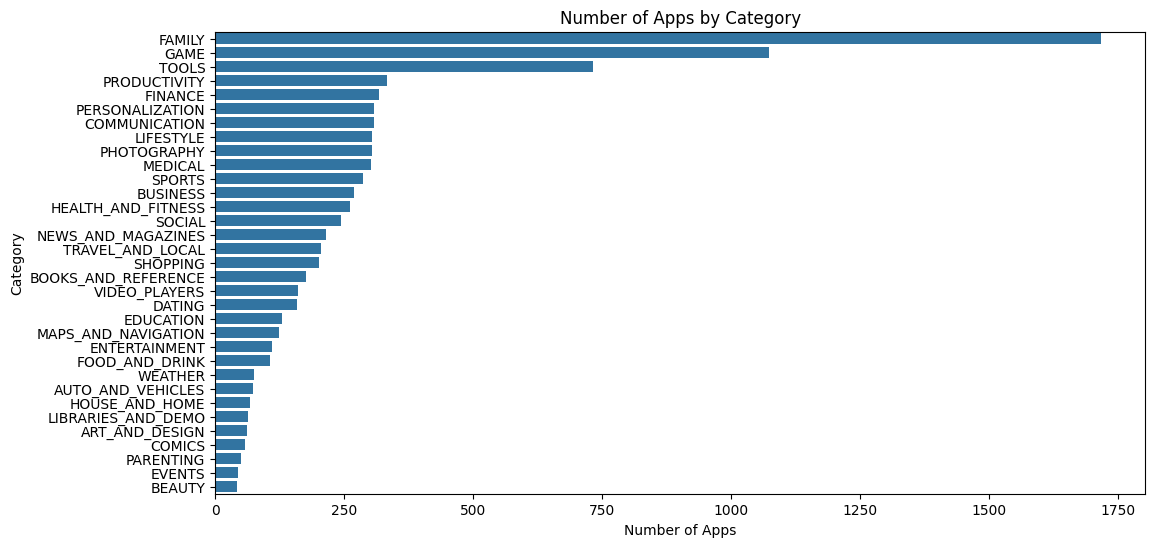

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6,6))
data['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Free vs. Paid Apps')
plt.ylabel('')
plt.show()


plt.figure(figsize=(12,6))
sns.countplot(y='Category', data=data, order = data['Category'].value_counts().index)
plt.title('Number of Apps by Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()


# Category **Analysis**

Category
EVENTS    4.435556
Name: Rating, dtype: float64
Category
GAME    1415533878
Name: Reviews, dtype: int64
Category
FAMILY    1717
Name: count, dtype: int64


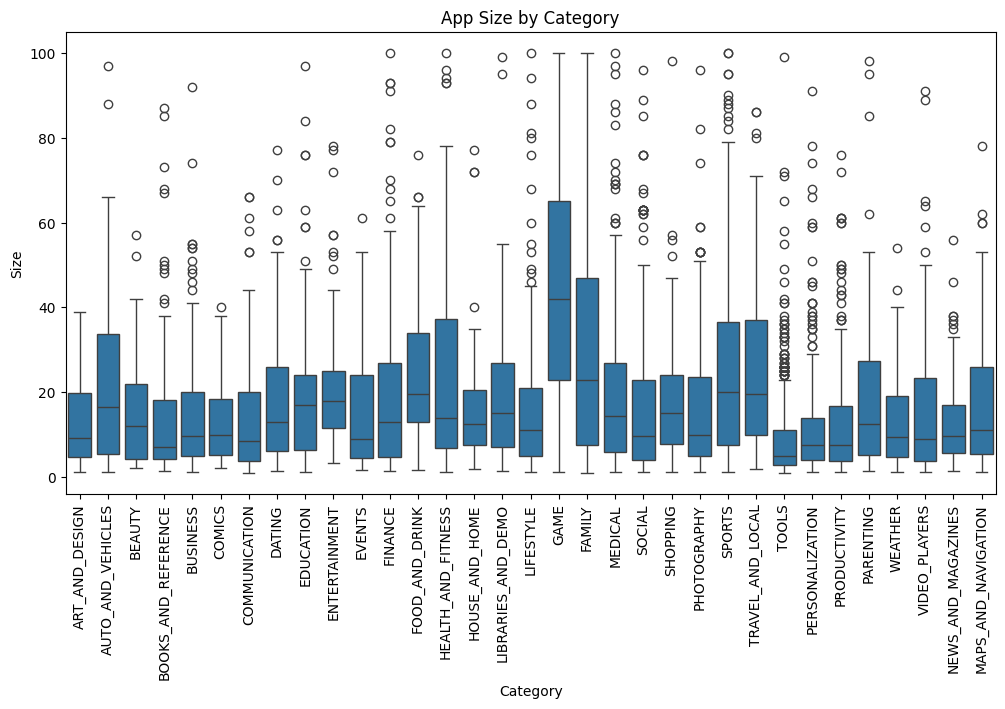

In [16]:
category_avg_rating = data.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print(category_avg_rating.head(1))

category_most_reviews = data.groupby('Category')['Reviews'].sum().sort_values(ascending=False)
print(category_most_reviews.head(1))

category_most_apps = data['Category'].value_counts()
print(category_most_apps.head(1))

plt.figure(figsize=(12,6))
sns.boxplot(x='Category', y='Size', data=data)
plt.title('App Size by Category')
plt.xticks(rotation=90)
plt.show()


## Impact of Reviews on **Ratings**

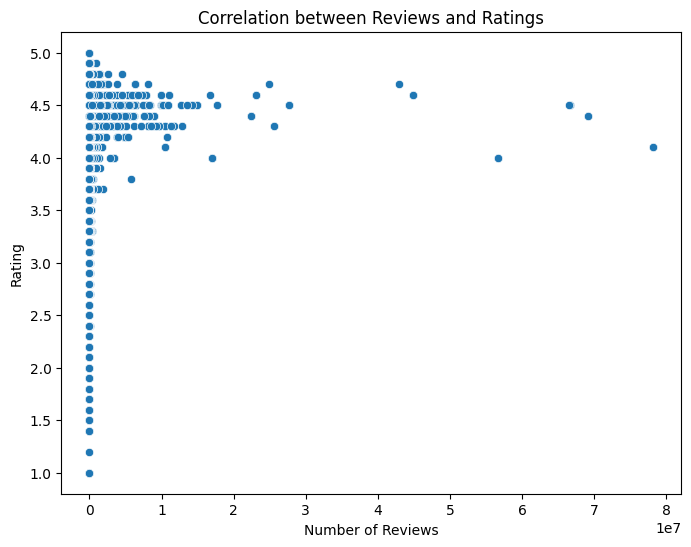

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Reviews', y='Rating', data=data)
plt.title('Correlation between Reviews and Ratings')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()
